In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [52]:
crime_csv = pd.read_csv("crime_data_clean.csv")
crime_df = pd.DataFrame(crime_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [53]:
home_ownership_df = home_ownership_df[["County", "HOR"]]
crime_df = crime_df[["county","crime_rate_per_100000"]]
crime_df = crime_df.rename(columns={"crime_rate_per_100000": "crime_rate_per_100,000"})
home_ownership_df  = home_ownership_df.rename(columns={"County": "county"})

In [54]:
crime_df.head()

,county,"crime_rate_per_100,000"
0,"St. Louis, MO",1791.995377
1,"Crittenden, AR",1754.914968
2,"Alexander, IL",1664.700485
3,"Kenedy, TX",1456.310680
4,"De Soto, LA",1447.402430


In [55]:
home_ownership_df.head()

,county,HOR
0,"Autauga, AL",73.3
1,"Baldwin, AL",72.9
2,"Barbour, AL",62.5
3,"Bibb, AL",75.4
4,"Blount, AL",78.5


In [56]:
sample_home_ownership = home_ownership_df.sample(n=650)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,county,HOR
0,"Orange, TX",75.3
1,"Anderson, KY",76.4
2,"Pendleton, WV",79.8
3,"Cotton, OK",78.3
4,"Emporia city, VA",42.6


In [57]:
crime_analysis = sample_home_ownership.merge(crime_df, on="county")
crime_analysis.head()

,county,HOR,"crime_rate_per_100,000"
0,"Orange, TX",75.3,355.605916
1,"Anderson, KY",76.4,55.018110
2,"Pendleton, WV",79.8,66.925445
3,"Cotton, OK",78.3,16.254876
4,"Val Verde, TX",63.2,137.794871


In [58]:
len(crime_analysis)

628

## Analysis

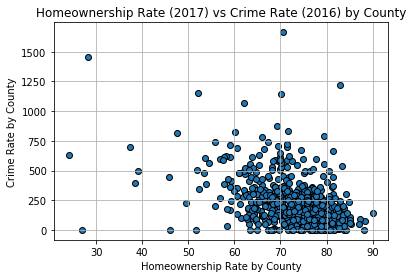

In [59]:
plt.scatter(crime_analysis["HOR"], crime_analysis["crime_rate_per_100,000"], marker="o", edgecolor='black')
plt.title("Homeownership Rate (2017) vs Crime Rate (2016) by County")
plt.xlabel("Homeownership Rate by County")
plt.ylabel("Crime Rate by County")
plt.grid(True)
plt.savefig('Pictures/Crime_rate_scatter.png')

In [60]:
x = crime_analysis["crime_rate_per_100,000"]
y = crime_analysis["HOR"]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HOR   R-squared (uncentered):                   0.507
Model:                            OLS   Adj. R-squared (uncentered):              0.507
Method:                 Least Squares   F-statistic:                              645.9
Date:                Sat, 07 Sep 2019   Prob (F-statistic):                    1.75e-98
Time:                        13:32:34   Log-Likelihood:                         -3361.1
No. Observations:                 628   AIC:                                      6724.
Df Residuals:                     627   BIC:                                      6729.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
crime_rate_per_100,000     0.1691      0.007     25.414      0.000       0.156       0.182
==============================================================================
Omnibus:                      282.073   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1574.091
Skew:                          -1.954   Prob(JB):                         0.00
Kurtosis:                       9.699   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""